In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [120]:
root = 'covid_meta/'
%matplotlib inline

In [129]:
df_meta = pd.read_csv(root+'covid_19_data.csv')

In [130]:
drop_cols = ['SNo', 'ObservationDate', 'Last Update']
df_meta.drop(columns=drop_cols, inplace=True, axis=1)

In [131]:
top10 = pd.DataFrame(df_meta.groupby('Country/Region')[['Confirmed','Deaths']].sum().sort_values(by='Confirmed',ascending=False))

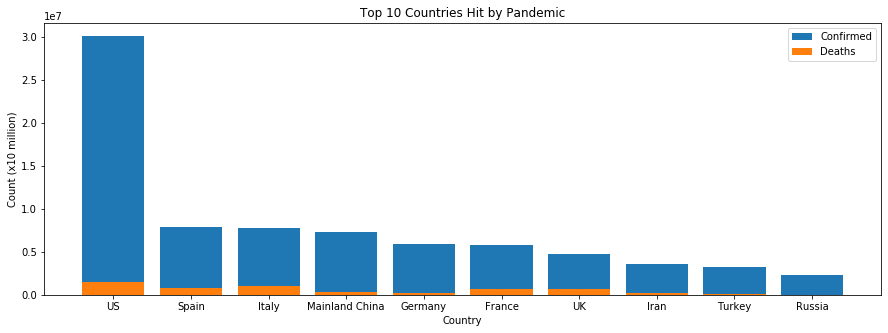

In [132]:
top10 = top10.head(10)
plt.figure(figsize=(15,5))
plt.bar(top10.index, top10['Confirmed'], label='Confirmed')
plt.bar(top10.index, top10['Deaths'], label='Deaths')
plt.title('Top 10 Countries Hit by Pandemic')
plt.xlabel('Country')
plt.ylabel('Count (x10 million)')
plt.legend()
plt.show()

In [136]:
US_c = pd.read_csv(root+'time_series_covid_19_confirmed_US.csv')
US_c

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,141,145,145,145,145,145,145,149,149,151
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,14,14,14,14,14,14,14,15,15,15
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,57,66,66,66,66,66,66,66,66,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,22,23,23,23,24,25,25,26,27,27
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,14,12,13,15,11,11,12,12,12,13
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,93,98,101,103,111,119,121,128,132,138
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,11,13,13,13,14,14,14,14,14,14


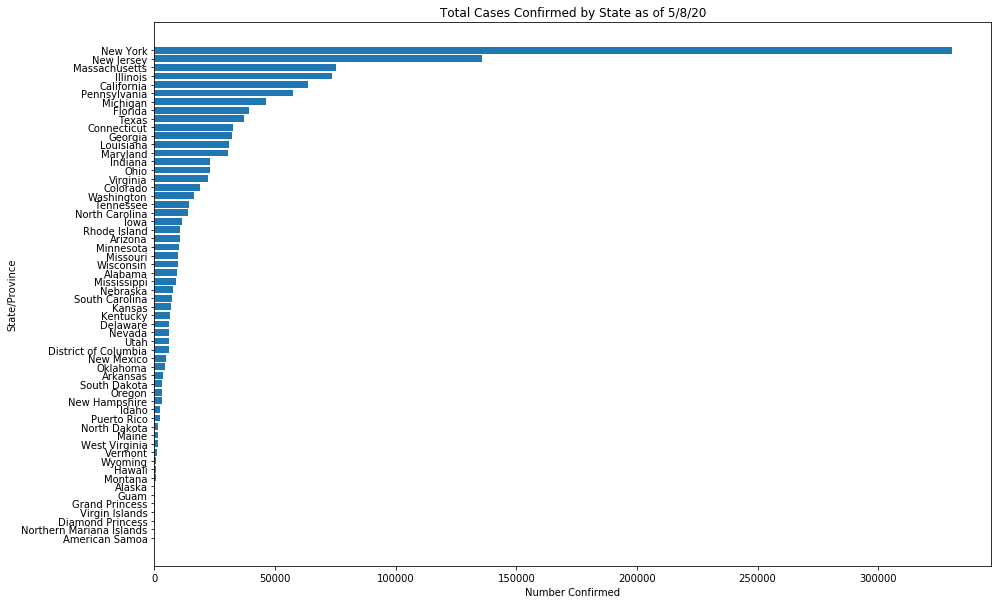

In [164]:
states = pd.DataFrame(US_c.groupby('Province_State').sum().sort_values(by='5/8/20'))

plt.figure(figsize=(15,10))
plt.barh(states.index, states['5/8/20'])
plt.xlabel('Number Confirmed')
plt.ylabel('State/Province')
plt.title('Total Cases Confirmed by State as of {}'.format(states.columns[-1]))
plt.show()

In [297]:
states = states[states.columns[5:]]
 
def reformat(df):
    data = []
    for state in df.index:
        for date in df.columns:
            data.append([state, date, df.loc[state, date]])
        
    return pd.DataFrame(data, columns=['State', 'Date', 'Count'])

In [298]:
top10 = states.tail(10)
top10_ = reformat(top10)

fig = px.line(top10_, x='Date', y='Count', color='State')
fig.update_layout(title='Cumulative Comfirmed Cases of Top 10 States Affected by COVID over Time')
fig.show()

In [299]:
all_states = reformat(states)

fig = px.line(all_states, x='Date', y='Count', color='State')
fig.update_layout(title='Cumulative Comfirmed Cases of All US Territories Affected by COVID over Time')
fig.show()

While we can see that NY has by far the most cumulative cases over time, it is beginning to level off already. Let's look at new cases.

In [318]:
def new_cases(df): 
    diffs = []
    for state in df['State'].unique():
        last = 0
        for i, row in df[df['State']==state].iterrows():
            diffs.append(row['Count']-last)
            last = row['Count']
    return diffs

In [331]:
all_states['New_Cases'] = new_cases(all_states)

fig = px.line(all_states, x='Date', y='New_Cases', color='State')
fig.update_layout(title='New COVID Cases per Day ')
fig.show()

In [332]:
top10_['New_Cases'] = new_cases(top10_)

fig = px.line(top10_, x='Date', y='New_Cases', color='State')
fig.update_layout(title='New COVID Cases Per Day of the Top 10 Affected States')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [333]:
states

,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,...,14,14,14,14,14,14,14,15,15,15
Diamond Princess,0,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
Virgin Islands,0,0,0,0,0,0,0,0,0,0,...,57,66,66,66,66,66,66,66,66,68
Grand Princess,0,0,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
Guam,0,0,0,0,0,0,0,0,0,0,...,141,145,145,145,145,145,145,149,149,151
Alaska,0,0,0,0,0,0,0,0,0,0,...,355,355,364,365,368,370,371,372,374,377
Montana,0,0,0,0,0,0,0,0,0,0,...,451,453,453,455,455,457,456,456,456,458
Hawaii,0,0,0,0,0,0,0,0,0,0,...,613,618,619,620,620,621,625,626,629,629
